# Time Series Forecasting

In [1]:
# Predict the sales of car

In [2]:
## Importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
## loading the data
data=pd.read_csv('sales-cars.csv')
data.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
data.Month[1]
# Month is actually given as string here

'2016-02'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   36 non-null     object
 1   Sales   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
## parsing the date (Converts the string representation of a date to Date object) 
# and using date column as index
data=pd.read_csv('sales-cars.csv',parse_dates=[0],index_col='Month')## parsing the date (Converts the string representation of a date to Date object) 
# and using date column as index
data=pd.read_csv('sales-cars.csv',parse_dates=[0],index_col='Month')

In [7]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [9]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [10]:
# Data Visualization

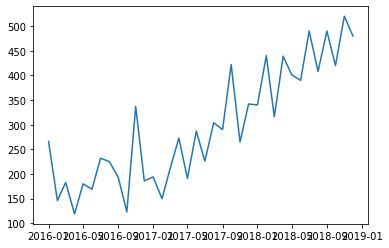

In [11]:
plt.plot(data)
plt.show()
## from plot we can see the series given is not stationary

# Stationarity

- Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
- Stationarity is important because many useful analytical tools and statistical tests and models rely on it.
- Constant mean
- Constant variance
- Constant covariance between periods of identical distance
- All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

- why do we need stationarity? 2 reasons (the most important ones): Stationary processes are easier to analyze Stationarity is assumed by most of the algorithms
- How to check if given series is stationary or not. We need to check autocorrelation Autocorrelation is the similarity between observations as a function of the time lag between them.
- When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series (see figure 1, right), while for non-stationary data the degradation will happen more slowly

In [12]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

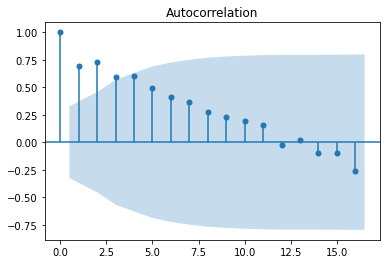

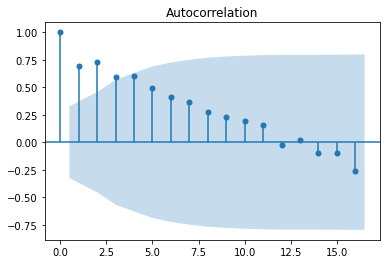

In [13]:
plot_acf(data)
## from the autocorrelation plot it is clear that given series is not stationary.
# if the correlation is slowly decaying, it means that the data is not stationary.

In [14]:
## make the data stationary by taking difference of 1
data1=data.diff(periods=1)

# integrated of order 1, denoted by d (d--> difference)

In [15]:
data1.head() # 1st row has NaN as there is no previous value to take difference

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [16]:
data1=data1.iloc[1:] # remove 1st row since it has nan

In [17]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


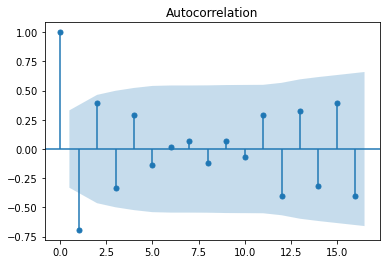

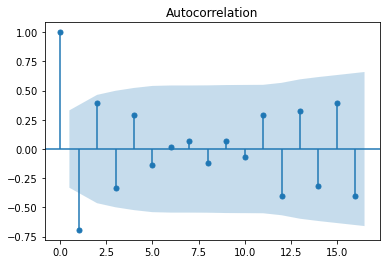

In [18]:
plot_acf(data1)

<AxesSubplot:xlabel='Month'>

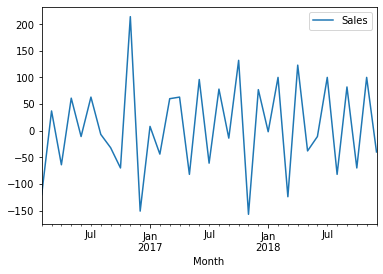

In [19]:
data1.plot()
# No trend here.. now data is stationary

In [20]:
data1.shape

(35, 1)

In [21]:
## Creating training and test sets
train=data1[:27] # 27th index record will excluded. 35: 0-26records for training 
test=data1[27:] # from 27th index all records for testing

In [22]:
train.shape

(27, 1)

In [23]:
# training data from 0 to 26 (27 records)

In [24]:
## Applying autoregressive model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [25]:
## model creation
ar_model = AR(train) # pass the training data to model

# Call fit function... 
ar_model_fit=ar_model.fit()

C:\Users\MUSADDIQ KHAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
##making prediction for test data (records from index 27 to 34)
prediction=ar_model_fit.predict(start=27,end=34) # starting point and ending point for prediction

In [27]:
test

,Sales
Month,
2018-05-01,-38.0
2018-06-01,-11.0
2018-07-01,100.0
2018-08-01,-82.0
2018-09-01,82.0
2018-10-01,-70.0
2018-11-01,100.0
2018-12-01,-40.0


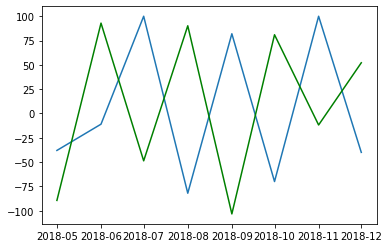

In [28]:
plt.plot(test)
plt.plot(prediction,color='green')

# ARIMA Model

In [29]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [30]:
data.shape

(36, 1)

In [31]:
train=data[:27] # Total 36 records: from 0-26 index for training (ie., 27records)
test=data[27:] # from 27th index all records for testing

In [32]:
train.shape

(27, 1)

In [33]:
test.shape

(9, 1)

In [34]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0)) # p,d,q 

#p - periods taken for autoregressive model
#d - how many times differencing is done (integrated order)
#q - peroids taken for moving average

model_arima_fit = model_arima.fit()

C:\Users\MUSADDIQ KHAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\MUSADDIQ KHAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [35]:
## evaluate the model
print(model_arima_fit.aic)

298.83254422707944


In [36]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=9)[0] # 9 records for predicting

# The result of the forecast() function is an array containing the forecast value, 
# the standard error of the forecast, and the confidence interval information.
# we are only interested in the first element of this forecast.. so index 0 to take 1st value.

In [37]:
predictions

array([412.89153813, 355.27063054, 405.73034968, 380.58825034,
       408.32921738, 399.07876324, 415.70360974, 414.22882227,
       425.41463164])

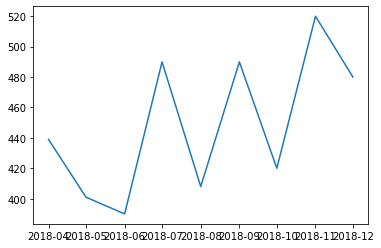

In [38]:
## plotting the test data
plt.plot(test)

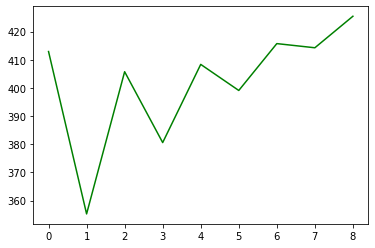

In [39]:
## plotting the forecasted values

plt.plot(predictions,color='green')

In [40]:
## Geeting the optimal values of p,q an d
import itertools # to create iterators

p =d= q=range(0,5)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809387858
(0, 0, 2) 315.2506002876686
(0, 0, 3) nan
(0, 0, 4) 310.1669328589044
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841529484621
(0, 1, 2) 296.32292269077936
(0, 1, 3) 298.3120211738952
(0, 1, 4) 300.3393975617954
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019462496378
(0, 2, 2) 290.3983520830236
(0, 2, 3) 292.98588426136365
(1, 0, 0) 316.16687175227673
(1, 0, 1) 313.0487174499728
(1, 0, 2) 310.97906422280414
(1, 0, 4) 309.67799311710337
(1, 1, 0) 298.83254422707944
(1, 1, 1) 297.1256511258629
(1, 1, 2) 299.47166670626365
(1, 1, 3) 301.2851180947741
(1, 1, 4) 299.9787323970369
(1, 2, 0) 306.53077675721624
(2, 0, 0) 310.99695736453157
(2, 0, 1) 338.67537294351996
(2, 1, 0) 300.2089561239993
(2, 1, 1) 297.9999930167365
(2, 1, 2) 298.5505428130234
(2, 1, 3) 302.8720828341381
(2, 2, 0) 306.29758564318274
(3, 0, 0) 312.98385874206883
(3, 0, 1) 334.25947227557987
(3, 1, 0) 294.8543584218737
(3, 1, 1) 295.9979353418428
(3, 1, 2) 292.668623

In [74]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 2, 1)) # p,d,q

model_arima_fit = model_arima.fit()

In [75]:
print(model_arima_fit.aic)

291.3991344717546


In [76]:
prediction = model_arima_fit.forecast(steps=8)[0] # step: going to predict 8 values i.e, the no of records in test data
prediction

array([419.86218854, 399.60372492, 480.05785293, 431.16695806,
       488.80129625, 488.07656667, 543.45024687, 535.49533549])

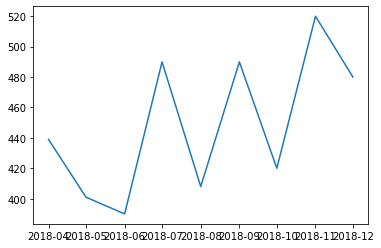

In [77]:
plt.plot(test)

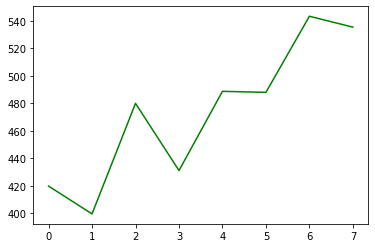

In [78]:
plt.plot(prediction,color='green')

In [79]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>